
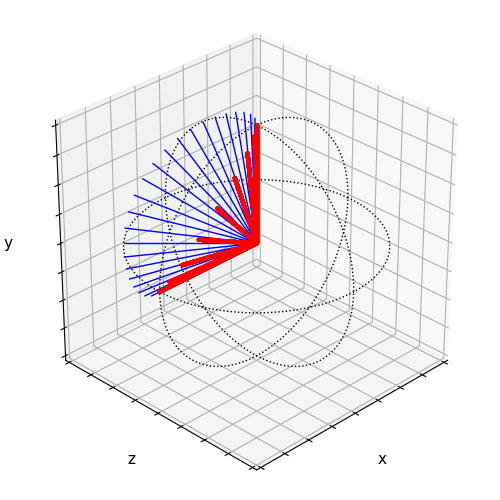

In [1]:
using Plots
pyplot(
    legend=false,
    xlims=(-1.0,1.0), ylims=(-1.0,1.0), zlims=(-1.0,1.0),
    xlab="x", ylab="z", zlab="y",
    size=(500,500), ticks=nothing
)

function get_axis(θ)
    rx = -1 + cos(θ) - sin(θ)
    ry = -1 - cos(θ) + sin(θ)
    rz =  1 - cos(θ) - sin(θ)
    
    r = √(rx^2 + ry^2 + rz^2)
    
    rx/r, ry/r, rz/r
end

function plot_1_4th_axes!(p)
    for θ = 0:π/16:π/2
        x, y, z = get_axis(θ)
        plot!(p, [0.0,x], [0.0,z], [0.0,-y],
              color=:red, lw=3)
    end
end

function plot_axes(cmrx, cmry)
    p = plot(θ->cos(θ), θ->sin(θ), θ->0, 0, 2π, color=:black, line=:dot)
    plot!(p, θ->0, θ->cos(θ), θ->sin(θ), 0, 2π, color=:black, line=:dot)
    plot!(p, θ->cos(θ), θ->0, θ->sin(θ), 0, 2π, color=:black, line=:dot)
    
    for θ = 0:π/16:2π
        x, y, z = get_axis(θ)
        (clr,wdt) = ifelse(θ<π/2, (:red,3), (:blue,1))
        plot!(p, [0.0,x], [0.0,z], [0.0,-y],
              color=clr, lw=wdt, camera=(cmrx,cmry))
        θ>π/2 && plot_1_4th_axes!(p)
    end
    p
end

plot_axes(-45, 30)


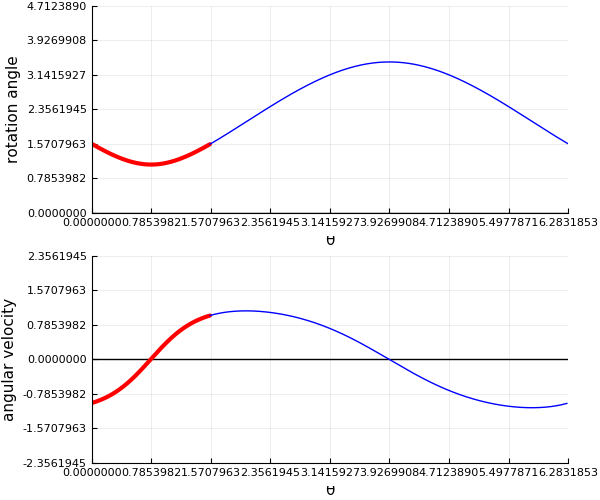

In [2]:
using Plots
pyplot(
    xlims=(0.0,2π),ylims=(0.0,3π/2),
    xlab="θ",
    ticks=-π:π/4:2π,
    legend=false, size=(600,500)
)

function Dx(ys, dx)
    len = length(ys)
    (getindex(ys, 2:len).-getindex(ys, 1:len-1))/dx
end

function plot_1_4th_bold(xs, ys, y_label, y_limit)
    len = length(xs)
    p = plot([0,2π], [0,0], color=:black)
    plot!(p, getindex(xs, 1:len÷4), getindex(ys, 1:len÷4), lw=3, ylab=y_label, ylims=y_limit, color=:red)
    plot!(p, getindex(xs, len÷4:len), getindex(ys, len÷4:len), lw=1, color=:blue)
    p
end

f(θ) = 2acos((1+cos(θ)+sin(θ))/(2*√2))
dθ = 0.01
θs = [θ for θ in 0:dθ:2π]
φs = [f(θ) for θ in θs]

plot(plot_1_4th_bold(θs, φs, "rotation angle", (0,3π/2)), plot_1_4th_bold(getindex(θs, 1:length(θs)-1), Dx(φs, dθ), "angular velocity", (-3π/4,3π/4)),
     layout=(2,1))